## Linear Regression Exercise
 - One of the biggest changes will be observed when you include the 'Model' feature we dropped in the beginning.
 - Perform feature selection
 - Create a regression where 'Price' is not transformed
 - Deal with the outliers in a different way

In [64]:
# Import pandas, numpy, matplotlib, seaborn, sklearn
import numpy as np

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

from sklearn.linear_model import LinearRegression

### Loading Data

In [65]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


### Preprocessing

#### Exploring the descriptive statistics of the variables

In [66]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [67]:
data = data.drop(["Model"], axis=1)
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


Let's include model variable in the datset for model analysis

#### Dealing with Missing values

In [68]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [69]:
data_no = data.dropna(axis=0)

In [70]:
data_no.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Exploring PDFs

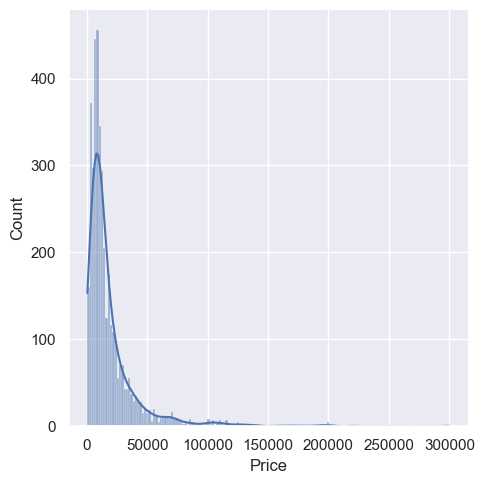

In [71]:
sns.displot(data_no["Price"],kde=True)

### Dealing with Outliers

In [72]:
# Let's remove outlier using 1.5 * IQR for pricing
percentile25 = data_no['Price'].quantile(0.25)
percentile75 = data_no['Price'].quantile(0.75)

print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  21900.0
25th quartile:  6999.0


In [73]:
iqr = percentile75 - percentile25
iqr

np.float64(14901.0)

In [74]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 44251.5
Lower limit -15352.5


In [75]:
data_no['Price'].min()

np.float64(600.0)

In [76]:
data_out = data_no[data_no['Price']<upper_limit]
data_out.shape

(3670, 8)

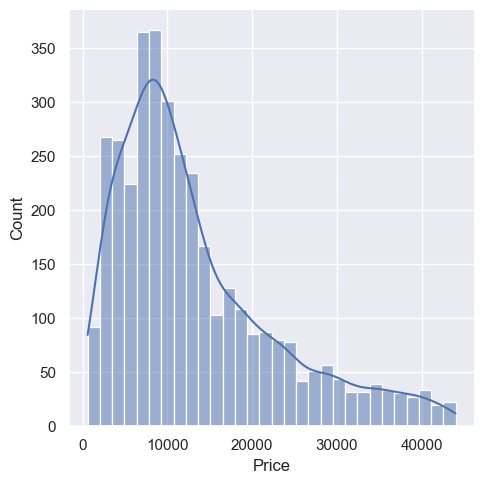

In [77]:
sns.displot(data_out["Price"],kde=True)

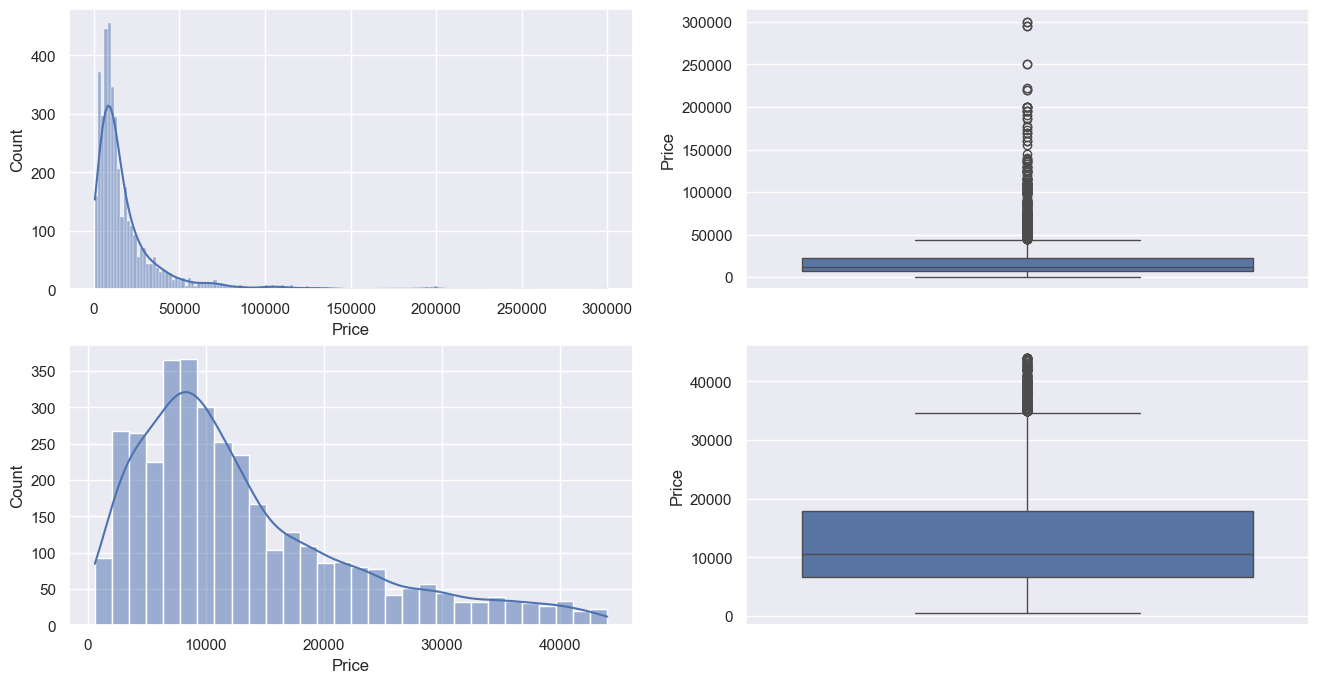

In [78]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data_no['Price'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data_no['Price'])

plt.subplot(2,2,3)
sns.histplot(data_out['Price'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = data_out['Price'])

plt.show()

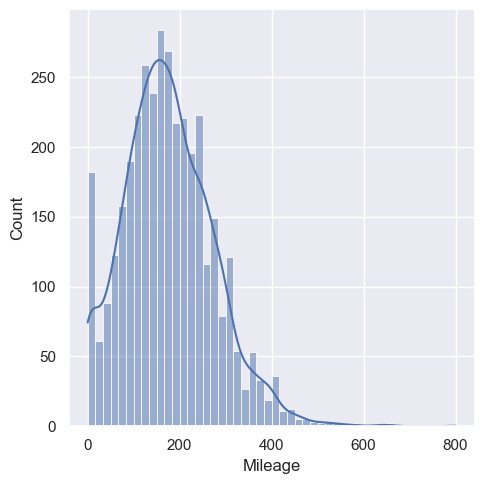

In [79]:
sns.displot(data_out["Mileage"],kde=True)

In [80]:
data_out.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3670,3670.00,3670,3670.00,3670.00,3670,3670,3670.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1459,NaN,NaN,1631,3299,NaN
mean,NaN,13338.80,NaN,175.57,2.70,NaN,NaN,2005.64
std,NaN,9581.34,NaN,97.58,5.15,NaN,NaN,6.52
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6650.00,NaN,108.00,1.80,NaN,NaN,2002.00
50%,NaN,10500.00,NaN,168.00,2.00,NaN,NaN,2007.00
75%,NaN,17900.00,NaN,238.00,2.80,NaN,NaN,2011.00


In [81]:
data_out =  data_out[data_out['EngineV'] <= 6.5]
data_out.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3648,3648.00,3648,3648.00,3648.00,3648,3648,3648.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1448,NaN,NaN,1624,3283,NaN
mean,NaN,13374.52,NaN,175.43,2.37,NaN,NaN,2005.65
std,NaN,9591.01,NaN,97.65,0.90,NaN,NaN,6.52
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6700.00,NaN,108.00,1.80,NaN,NaN,2002.00
50%,NaN,10500.00,NaN,168.00,2.00,NaN,NaN,2007.00
75%,NaN,17900.00,NaN,238.00,2.80,NaN,NaN,2011.00


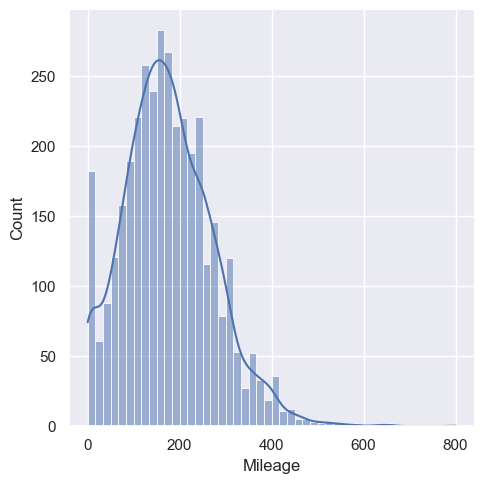

In [82]:
sns.displot(data_out["Mileage"],kde=True)

In [83]:
data_cleaned = data_out 

### Checking OLS Assumpution

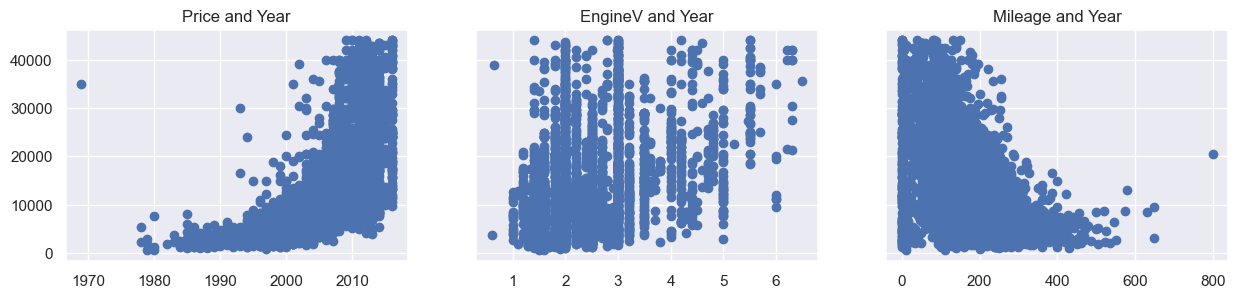

In [84]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title('EngineV and Year')
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title('Mileage and Year')

plt.show()

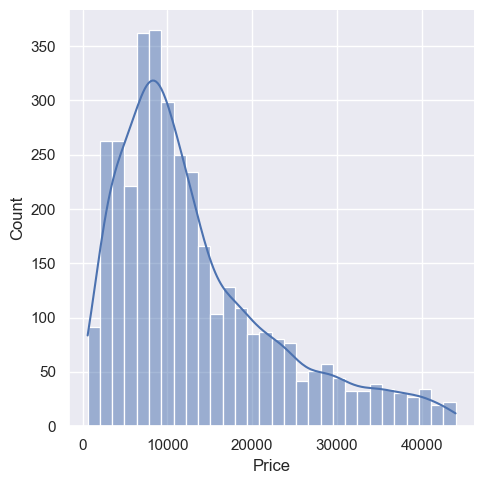

In [85]:
sns.displot(data_cleaned["Price"], kde=True)

#### Multi Colinerity

In [86]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'], dtype=object)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[["Mileage", "EngineV", "Year"]]
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [88]:
variables = data_cleaned[["Mileage", "EngineV", "Year"]]

# Computing VIF
vif = pd.DataFrame()
vif["features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [89]:
vif

,features,VIF
0,Mileage,4.24
1,EngineV,8.02
2,Year,10.30


### Create Dummy Variables

In [90]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.00,277,2.00,1991,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.00,427,2.90,1999,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.00,358,5.00,2003,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.00,240,4.20,2007,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.00,120,2.00,2011,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [91]:
data_with_dummies.shape

(3648, 19)

In [92]:
data_no_multicollienearity  = data_with_dummies.drop(["Year"], axis=1)

#### Rearrange bit

In [93]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [94]:
cols = ['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [95]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.00,277,2.00,1991,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.00,427,2.90,1999,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.00,358,5.00,2003,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.00,240,4.20,2007,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.00,120,2.00,2011,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


#### Linear Regression
##### Declare the input and the target

In [96]:
targets = data_preprocessed["Price"]
inputs = data_preprocessed.drop(["Price"], axis=1)

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [98]:
inputs_scaled = scaler.transform(inputs)

##### Training & Testing Dataset


In [99]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

##### Create Liner Regression

In [100]:
x_train.shape

(2918, 18)

In [101]:
y_train.shape

(2918,)

In [102]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [103]:
y_hat = reg.predict(x_train)

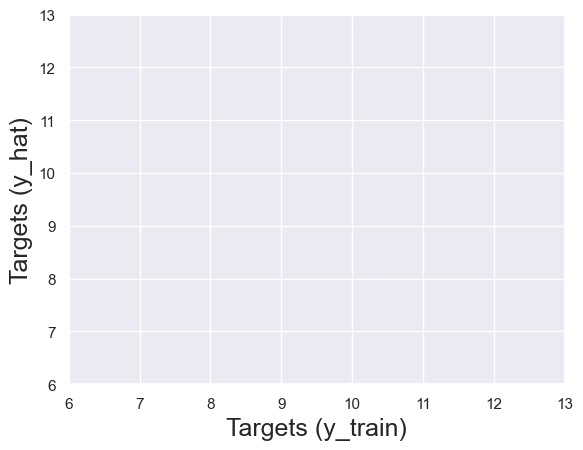

In [104]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Targets (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

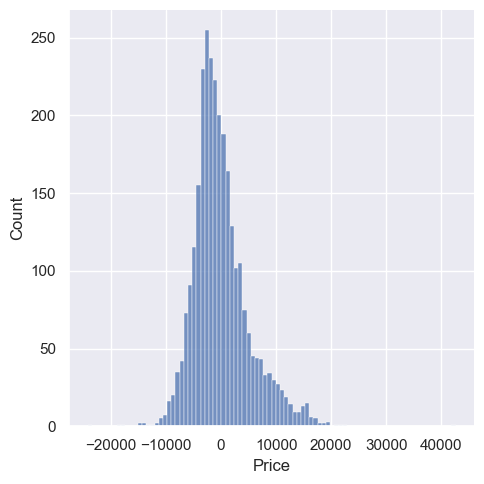

In [105]:
sns.displot(y_train-y_hat)

In [106]:
reg.score(x_train, y_train)

0.7183320859315369

In [107]:
reg.intercept_

np.float64(13408.111302883322)

In [108]:
reg.coef_

array([-2079.34733596,  2409.52291191,  4455.66767747,    62.79629425,
        -164.97031811, -1985.43637048, -2460.59253511, -1141.62168576,
       -1432.28124129, -1572.48038714, -1256.11653565, -2412.59845044,
       -1689.78542237, -2792.27410902,  -780.08027378,  -275.2548494 ,
        -604.36435211,  2114.86819233])

In [109]:
len(inputs.columns.values)

18

In [110]:
Coef  =  pd.DataFrame()
Coef["Features"] = inputs.columns.values
Coef["Weights"] = reg.coef_
Coef.head(20)

,Features,Weights
0,Mileage,-2079.35
1,EngineV,2409.52
2,Year,4455.67
3,Brand_BMW,62.80
4,Brand_Mercedes-Benz,-164.97
5,Brand_Mitsubishi,-1985.44
6,Brand_Renault,-2460.59
7,Brand_Toyota,-1141.62
8,Brand_Volkswagen,-1432.28
9,Body_hatch,-1572.48


##### Testing

In [111]:
y_hat_test = reg.predict(x_test)

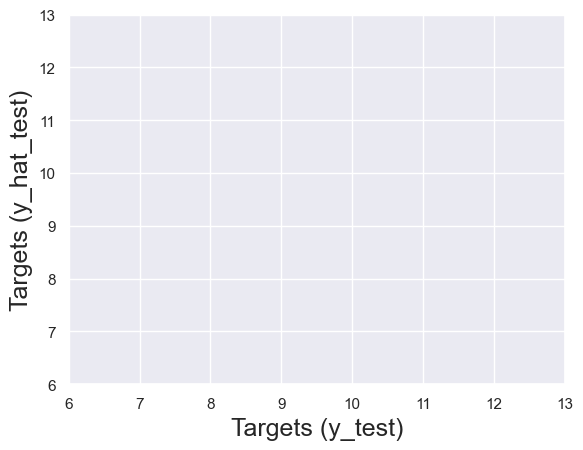

In [112]:
plt.scatter(y_test, y_hat_test)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Targets (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show() 

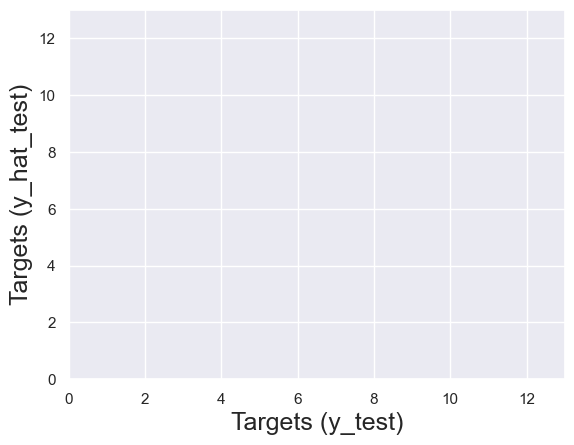

In [113]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Targets (y_hat_test)", size=18)
plt.xlim(0,13)
plt.ylim(0,13)
plt.show()

In [114]:
df_pf = pd.DataFrame(y_hat_test, columns=["Pred"])
df_pf

,Pred
0,7232.06
1,5663.61
2,14230.49
3,13711.17
4,18476.48
...,...
725,-1460.84
726,6490.99
727,15048.96
728,20107.56


In [115]:
df_pf["Target"] = (y_test)
df_pf.head()

,Pred,Target
0,7232.06,NaN
1,5663.61,NaN
2,14230.49,NaN
3,13711.17,NaN
4,18476.48,NaN


In [116]:
y_test = y_test.reset_index(drop=True)

In [117]:
df_pf["Target"] = (y_test)
df_pf.head()

,Pred,Target
0,7232.06,5800.00
1,5663.61,4700.00
2,14230.49,9800.00
3,13711.17,9900.00
4,18476.48,9999.00


In [118]:
df_pf["residual"] =  df_pf["Target"] - df_pf["Pred"]

In [119]:
df_pf.head()

,Pred,Target,residual
0,7232.06,5800.00,-1432.06
1,5663.61,4700.00,-963.61
2,14230.49,9800.00,-4430.49
3,13711.17,9900.00,-3811.17
4,18476.48,9999.00,-8477.48


In [120]:
df_pf["Diff %"] = np.absolute(df_pf["residual"]/df_pf["Target"] * 100)

In [121]:
df_pf.describe()

,Pred,Target,residual,Diff %
count,730.00,730.00,730.00,730.00
mean,13096.44,12928.58,-167.86,49.18
std,8118.06,9554.45,5005.65,76.22
min,-8320.27,600.00,-14274.59,0.27
25%,7530.67,6500.00,-3314.05,11.77
50%,12907.10,9925.00,-978.88,25.91
75%,18595.44,17500.00,2301.11,52.31
max,32634.80,44000.00,20782.57,687.14


In [122]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=["Diff %"])

,Pred,Target,residual,Diff %
446,18348.65,18300.00,-48.65,0.27
330,20053.60,20000.00,-53.60,0.27
63,23268.16,23333.00,64.84,0.28
439,13858.57,13900.00,41.43,0.30
378,11144.42,11100.00,-44.42,0.40
...,...,...,...,...
537,-7153.34,1900.00,9053.34,476.49
648,-4967.99,1199.00,6166.99,514.34
283,-5092.50,1100.00,6192.50,562.95
717,-5952.41,1185.60,7138.01,602.06
